In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("salida.csv")
df

,Hilos,Schedule,Chunk,Limite,Primes,Tiempo
0,1,Static,100,10000000,664579,4.314183
1,1,Dynamic,100,10000000,664579,4.271923
2,1,Static,1000,10000000,664579,4.247151
3,1,Dynamic,1000,10000000,664579,4.267970
4,1,Static,10000,10000000,664579,4.285822
...,...,...,...,...,...,...
211,6,Dynamic,100000,10000000,664579,0.747876
212,6,Static,1000000,10000000,664579,0.997089
213,6,Dynamic,1000000,10000000,664579,1.014275
214,6,Static,10000000,10000000,664579,4.245803


In [4]:
df_grouped = df.groupby(["Hilos", "Schedule", "Chunk", "Limite"])["Tiempo"].mean().reset_index()
df_grouped.drop("Limite", inplace=True, axis=1)
df_grouped

,Hilos,Schedule,Chunk,Tiempo
0,1,Dynamic,100,4.275592
1,1,Dynamic,1000,4.279572
2,1,Dynamic,10000,4.270383
3,1,Dynamic,100000,4.265790
4,1,Dynamic,1000000,4.291489
...,...,...,...,...
67,6,Static,1000,0.731909
68,6,Static,10000,0.732432
69,6,Static,100000,0.753259
70,6,Static,1000000,1.000706


In [5]:
dfSec = df_grouped[df_grouped["Hilos"] == 1]
dfPar = df_grouped[df_grouped["Hilos"] != 1]

In [6]:
dfMerged = dfSec.merge(right=dfPar, how="inner", on=["Schedule", "Chunk"], suffixes=("_sec", "_par"))

In [7]:
dfMerged["Speedup"] = dfMerged["Tiempo_sec"] / dfMerged["Tiempo_par"]

In [8]:
dfMerged.head(10)

,Hilos_sec,Schedule,Chunk,Tiempo_sec,Hilos_par,Tiempo_par,Speedup
0,1,Dynamic,100,4.275592,2,2.150623,1.988072
1,1,Dynamic,100,4.275592,3,1.452525,2.943558
2,1,Dynamic,100,4.275592,4,1.089351,3.924898
3,1,Dynamic,100,4.275592,5,0.878302,4.868018
4,1,Dynamic,100,4.275592,6,0.728825,5.866415
5,1,Dynamic,1000,4.279572,2,2.154312,1.986515
6,1,Dynamic,1000,4.279572,3,1.450140,2.951144
7,1,Dynamic,1000,4.279572,4,1.087563,3.935012
8,1,Dynamic,1000,4.279572,5,0.872192,4.906688
9,1,Dynamic,1000,4.279572,6,0.727843,5.879798


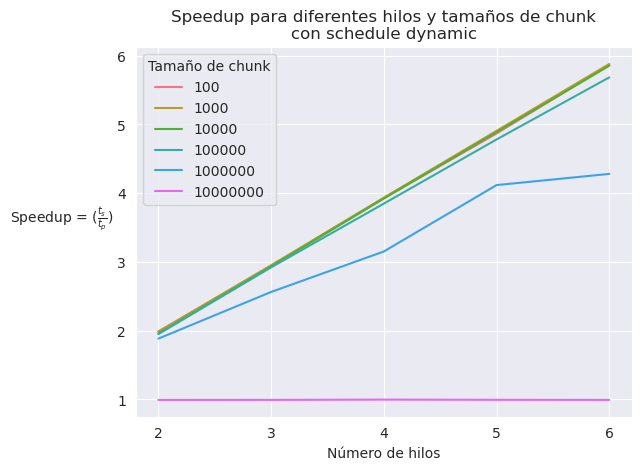

In [11]:
sns.set_style("darkgrid")
colores = sns.color_palette("husl", n_colors=len(dfMerged['Chunk'].unique()))
sns.lineplot(dfMerged[dfMerged["Schedule"] == "Dynamic"], hue="Chunk", palette=colores, y="Speedup",x="Hilos_par")
plt.title("Speedup para diferentes hilos y tamaños de chunk\ncon schedule dynamic")
plt.ylabel(r"Speedup = ($\frac{t_s}{t_p}$)", rotation=0, labelpad=40)
plt.xlabel("Número de hilos")
plt.xticks(dfMerged["Hilos_par"].unique())
plt.legend(title="Tamaño de chunk")
plt.savefig("imgs/salida1.png")
plt.show()

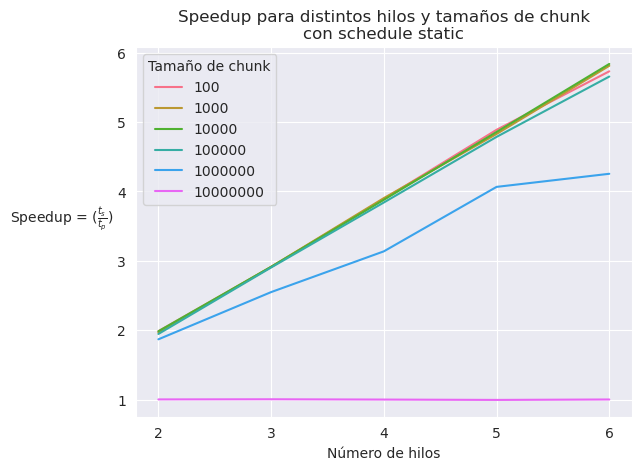

In [14]:
sns.set_style("darkgrid")
colores = sns.color_palette("husl", n_colors=len(dfMerged['Chunk'].unique()))
sns.lineplot(dfMerged[dfMerged["Schedule"] == "Static"], hue="Chunk", y="Speedup",x="Hilos_par", palette=colores)
plt.title("Speedup para distintos hilos y tamaños de chunk\ncon schedule static")
plt.ylabel(r"Speedup = ($\frac{t_s}{t_p}$)", rotation=0, labelpad=40)
plt.xticks(dfMerged["Hilos_par"].unique())
plt.legend(title="Tamaño de chunk")
plt.xlabel("Número de hilos")
plt.savefig("imgs/salida2.png")
plt.show()